## Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

In [2]:
from src.fit_model import FitModel
from src.split_data import SplitData

## Visualize data

In [3]:
df = pd.read_csv('./data/hmnist_28_28_RGB.csv')

In [21]:
classes = {0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           1:('bcc' , ' basal cell carcinoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           3: ('df', 'dermatofibroma'),
           4: ('nv', ' melanocytic nevi'), 
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           6: ('mel', 'melanoma'),      
           }

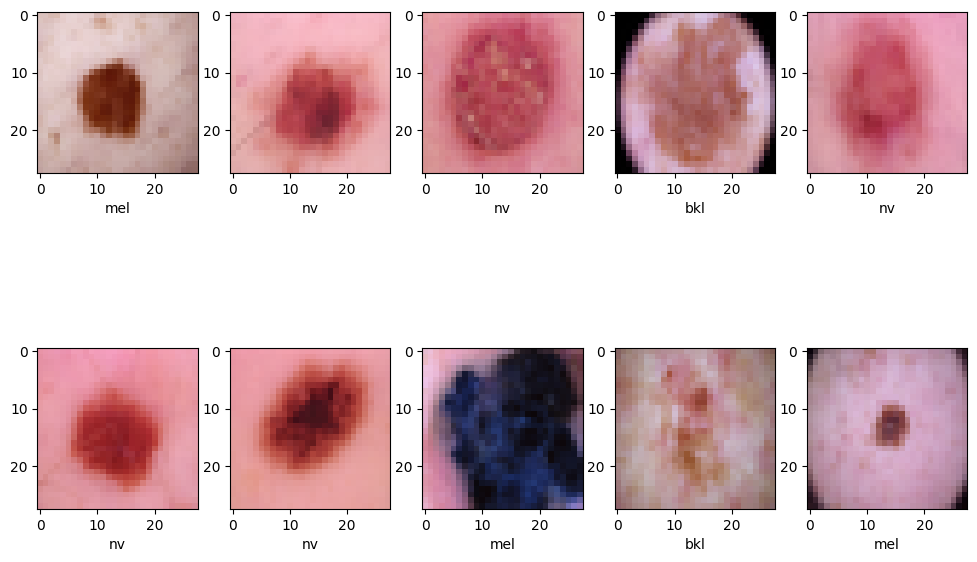

In [24]:
plt.figure(figsize=(12,8))
for i in range(1,11):
    plt.subplot(2,5,i)
    idx = np.random.randint(0,5000)
    plt.imshow(np.array(df)[idx][:-1].reshape(28,28,3), interpolation='nearest')
    plt.xlabel(classes[np.array(df)[idx][-1]][0])

In [5]:
X_train,X_test,y_train,y_test = SplitData(df)

## ANN

In [6]:
ann_model = nn.Sequential(
    nn.Linear(28*28*3,128),
    nn.ReLU(),
    nn.Linear(128,256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256,7),
    nn.Softmax(dim=-1)
)
optimizer2 = torch.optim.Adam(ann_model.parameters(),lr=1e-3)
criterion2 = torch.nn.CrossEntropyLoss()

In [7]:
FitModel(X_train,X_test,y_train,y_test,
         model=ann_model,
         criterion=criterion2,
         optimizer=optimizer2,
         epoch=20,
         batch_size=64)

EPOCH     0 | LOSS: 1.8662 | TRAIN ACC: 31.67% | VAL ACC: 31.91% |
EPOCH     1 | LOSS: 1.8278 | TRAIN ACC: 31.24% | VAL ACC: 30.94% |
EPOCH     2 | LOSS: 1.7663 | TRAIN ACC: 42.67% | VAL ACC: 42.91% |
EPOCH     3 | LOSS: 1.7239 | TRAIN ACC: 49.21% | VAL ACC: 48.63% |
EPOCH     4 | LOSS: 1.6967 | TRAIN ACC: 51.89% | VAL ACC: 51.12% |
EPOCH     5 | LOSS: 1.6811 | TRAIN ACC: 48.77% | VAL ACC: 48.51% |
EPOCH     6 | LOSS: 1.6649 | TRAIN ACC: 50.94% | VAL ACC: 50.41% |
EPOCH     7 | LOSS: 1.6416 | TRAIN ACC: 49.73% | VAL ACC: 48.73% |
EPOCH     8 | LOSS: 1.6291 | TRAIN ACC: 56.39% | VAL ACC: 55.64% |
EPOCH     9 | LOSS: 1.6161 | TRAIN ACC: 57.48% | VAL ACC: 56.81% |
EPOCH    10 | LOSS: 1.6092 | TRAIN ACC: 50.67% | VAL ACC: 49.88% |
EPOCH    11 | LOSS: 1.5818 | TRAIN ACC: 60.68% | VAL ACC: 59.88% |
EPOCH    12 | LOSS: 1.5700 | TRAIN ACC: 59.56% | VAL ACC: 59.22% |
EPOCH    13 | LOSS: 1.5746 | TRAIN ACC: 62.98% | VAL ACC: 62.42% |
EPOCH    14 | LOSS: 1.5524 | TRAIN ACC: 48.52% | VAL ACC: 47.6

## CNN

In [8]:
cnn_model = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=16,kernel_size=(3,3)),
    nn.ReLU(),
    nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Conv2d(in_channels=32,out_channels=32,kernel_size=(3,3)),
    nn.ReLU(),
    nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Flatten(1),
    nn.Linear(1024,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,7)



)
optimizer = torch.optim.Adam(cnn_model.parameters(),lr=1e-3)
criterion = torch.nn.CrossEntropyLoss()


In [11]:
FitModel(X_train.view(-1,3,28,28),X_test.view(-1,3,28,28),y_train,y_test,
         model=cnn_model,
         criterion=criterion,
         optimizer=optimizer,
         epoch=20,
         batch_size=64)

EPOCH     0 | LOSS: 1.0432 | TRAIN ACC: 65.71% | VAL ACC: 65.09% |
EPOCH     1 | LOSS: 0.9100 | TRAIN ACC: 67.59% | VAL ACC: 66.98% |
EPOCH     2 | LOSS: 0.7969 | TRAIN ACC: 72.17% | VAL ACC: 71.52% |
EPOCH     3 | LOSS: 0.7196 | TRAIN ACC: 75.12% | VAL ACC: 74.03% |
EPOCH     4 | LOSS: 0.6499 | TRAIN ACC: 75.31% | VAL ACC: 74.75% |
EPOCH     5 | LOSS: 0.5988 | TRAIN ACC: 81.04% | VAL ACC: 80.39% |
EPOCH     6 | LOSS: 0.5412 | TRAIN ACC: 81.62% | VAL ACC: 80.75% |
EPOCH     7 | LOSS: 0.4898 | TRAIN ACC: 82.02% | VAL ACC: 80.91% |
EPOCH     8 | LOSS: 0.4477 | TRAIN ACC: 85.12% | VAL ACC: 83.79% |
EPOCH     9 | LOSS: 0.4038 | TRAIN ACC: 87.49% | VAL ACC: 86.17% |
EPOCH    10 | LOSS: 0.3680 | TRAIN ACC: 87.05% | VAL ACC: 86.46% |
EPOCH    11 | LOSS: 0.3582 | TRAIN ACC: 86.44% | VAL ACC: 85.60% |
EPOCH    12 | LOSS: 0.2972 | TRAIN ACC: 90.51% | VAL ACC: 89.40% |
EPOCH    13 | LOSS: 0.2664 | TRAIN ACC: 86.34% | VAL ACC: 85.20% |
EPOCH    14 | LOSS: 0.2708 | TRAIN ACC: 92.41% | VAL ACC: 91.1